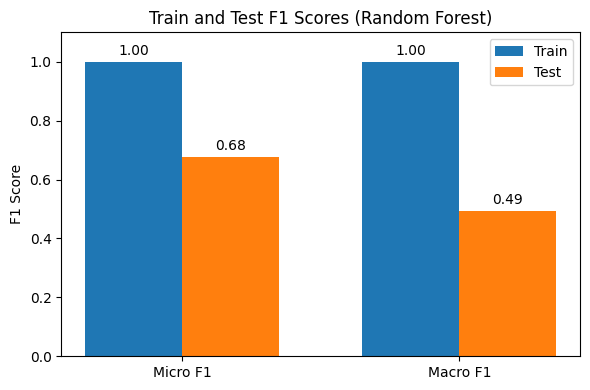

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 결과
train_micro = 0.9994
train_macro = 0.9995
test_micro = 0.6755
test_macro = 0.4929

# 바 차트용 데이터 정리
labels = ['Micro F1', 'Macro F1']
train_scores = [train_micro, train_macro]
test_scores = [test_micro, test_macro]

x = np.arange(len(labels))  # [0, 1]
width = 0.35  # 바 너비

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# 라벨 및 제목
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1.1)
ax.set_title('Train and Test F1 Scores (Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 바 위에 숫자 출력
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


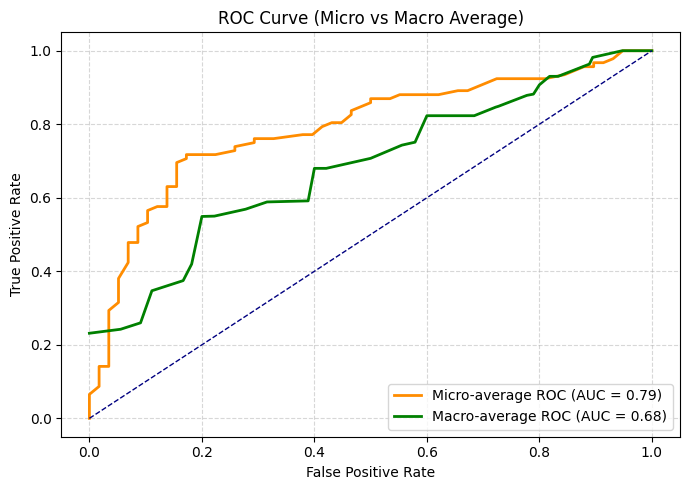

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import multilabel_confusion_matrix

# === 1. 모델 학습 ===
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=77))
model.fit(X_train, y_train)

# === 2. 확률 예측 ===
# 각 클래스별 확률 예측값 추출 (n_classes 개별)
y_score = np.array([est.predict_proba(X_test)[:, 1] for est in model.estimators_]).T

# === 3. ROC Curve (Micro/Macro) ===
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# === Micro-average ===
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# === Macro-average ===
# 먼저 모든 fpr 지점을 통일
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# 각 tpr 보간 후 평균
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# === ROC Plot ===
plt.figure(figsize=(7, 5))
plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average ROC (AUC = {roc_auc['micro']:.2f})", color='darkorange', lw=2)
plt.plot(fpr["macro"], tpr["macro"], label=f"Macro-average ROC (AUC = {roc_auc['macro']:.2f})", color='green', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro vs Macro Average)')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


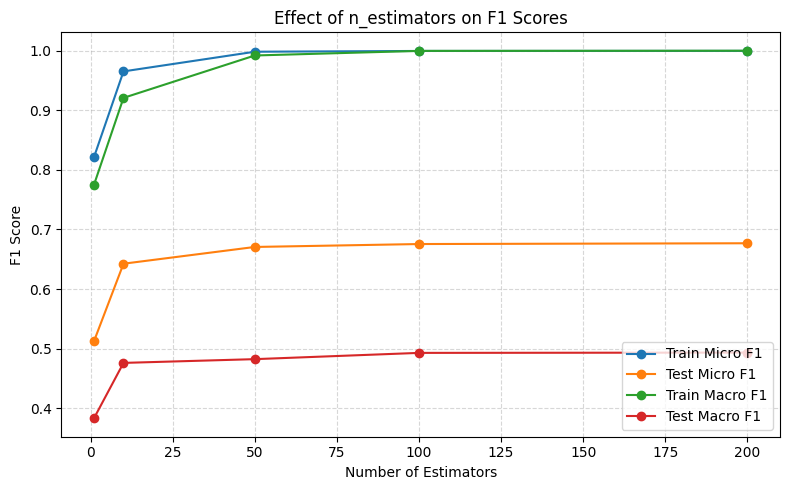

In [ ]:
import matplotlib.pyplot as plt

n_estimators = [1, 10, 50, 100, 200]
train_micro = [0.8211, 0.9651, 0.9981, 0.9994, 0.9995]
train_macro = [0.7747, 0.9207, 0.9918, 0.9995, 0.9998]
test_micro = [0.5123, 0.6425, 0.6706, 0.6755, 0.6768]
test_macro = [0.3831, 0.4761, 0.4824, 0.4929, 0.4934]

plt.figure(figsize=(8, 5))
plt.plot(n_estimators, train_micro, marker='o', label='Train Micro F1')
plt.plot(n_estimators, test_micro, marker='o', label='Test Micro F1')
plt.plot(n_estimators, train_macro, marker='o', label='Train Macro F1')
plt.plot(n_estimators, test_macro, marker='o', label='Test Macro F1')

plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.title("Effect of n_estimators on F1 Scores")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
